In [13]:
"""Portfolio managers design factor models that tell them 
how to balance a portfolio to earn alpha. 
Because alpha is how managers get paid, they only want exposure to their factors. 
Beta hedging removes the part of returns driven by the market 
and leaves only the returns driven by the factors.
If this sounds complicated there’s good news: 
You can hedge beta with the same linear regression you learned in Statistics 101. 
And you can do it with Python.
"""
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt

from openbb_terminal.sdk import openbb

In [3]:
"""Next, get the data. I use TSLA as an example of a stock portfolio. 
You can use actual portfolio returns instead.
"""
asset = openbb.stocks.load("TSLA", start_date = "2014-01-01", end_date = "2015-01-01")["Adj Close"]
benchmark = openbb.stocks.load("SPY", start_date = "2014-01-01", end_date = "2015-01-01")["Adj Close"]

Loading Daily data for TSLA with starting period 2014-01-02.
Loading Daily data for SPY with starting period 2014-01-02.


In [8]:
# Pulls the Returns
asset_returns = asset.pct_change().dropna()
benchmark_returns = benchmark.pct_change().dropna()



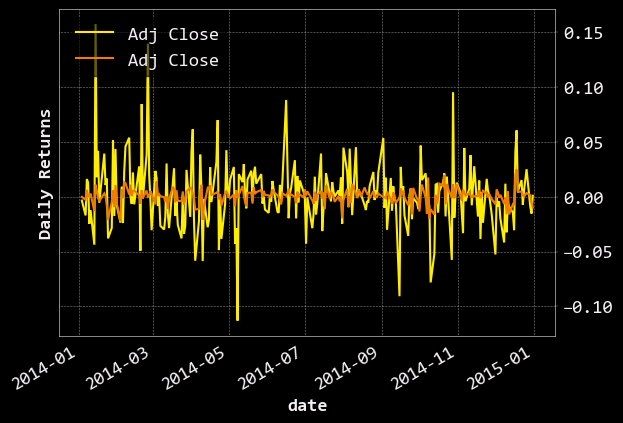

In [11]:
# Plots the Returns
asset_returns.plot()
benchmark_returns.plot()
plt.ylabel("Daily Returns")
plt.legend()

In [21]:
# Finds the portfolio’s alpha and beta using linear regression
X = benchmark_returns.values
Y = asset_returns.values

def linreg(x, y):
    # Add a column of 1s to fit alpha
    x =sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()
    # Remove the constant now that we're done
    x = x[:, 1]
    return model.params[0], model.params[1]

alpha, beta = linreg(X,Y)
print(f"Alpha: {alpha}")
print(f"Beta: {beta}")

Alpha: 0.0009171562982183532
Beta: 1.954155446267522


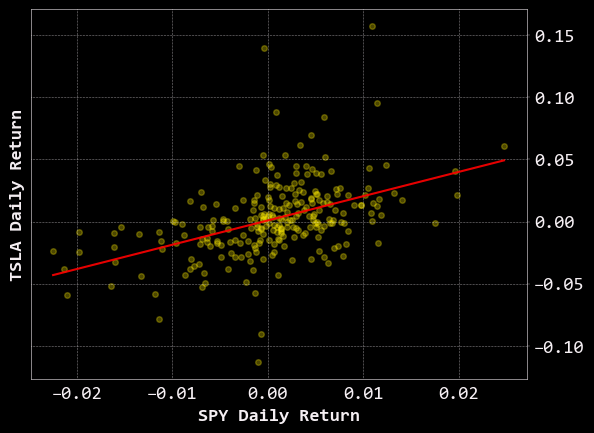

In [22]:
# Plots the returns and the regression line.

X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2* beta + alpha

# Plot the raw data
plt.scatter(X, Y, alpha = 0.3)
plt.xlabel("SPY Daily Return")
plt.ylabel("TSLA Daily Return")

# Add the Regression Line
plt.plot(X2,Y_hat, 'r', alpha = 0.9);

In [ ]:
# When SPY’s returns are 0, TSLA’s returns are near 0 too. That’s the intercept (alpha). 
# The slope (beta) is measured by the change in TSLA 
# divided by the change in SPY of the red line which is 1.95.

In [23]:
# Because you’re only interested in exposure to the returns 
# generated by owning TSLA, hedge the beta. 
# Hedging beta will result in a portfolio with returns close to 0 
# because alpha is close to 0
# The first step is to construct a beta-hedged portfolio.

# Constructs a Beta-Hedged Portfolio
portfolio = -1 * beta * benchmark_returns + asset_returns
portfolio.name = "TSLA + Hedge"

In [ ]:
"""This says “be short a number of shares in the market equal to the beta plus TSLA.”
Since we’re beta hedged (market neutral), 
you should expect that the portfolio returns closely resemble that of TSLA. 
In other words, your exposure is concentrated in your source of alpha.
"""

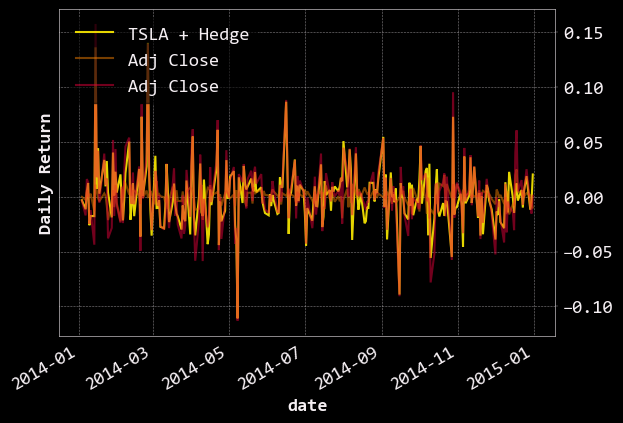

In [26]:
# PLots the returns of the portfolio on top of the asset itself.
portfolio.plot(alpha = 0.9)
benchmark_returns.plot(alpha = 0.5)
asset_returns.plot(alpha = 0.5)
plt.ylabel("Daily Return")
plt.legend();

In [28]:
# Prints Mean and the Volatilites (Standard Deviations) of the respective portfolios
print("means: ", portfolio.mean(), asset_returns.mean())
print("Volatilities: ", portfolio.std(), asset_returns.std())

means:  0.0009171562982183537 0.0020245307643899256
Volatilities:  0.027190301795316965 0.030498015968074547


In [31]:
P = portfolio.values
alpha, beta = linreg(X, P)
print('Alpha: ' + str(alpha))
print('Beta: ' + str(beta))


Alpha: 0.0009171562982183528
Beta: 3.2959746043559335e-16
